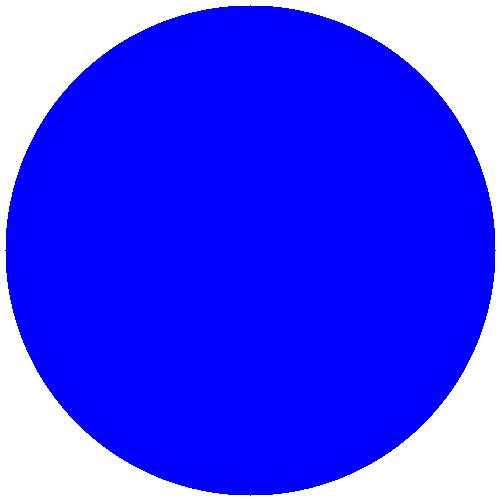

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
#這裡練習使用影片儲存來看,會比較順
#建立儲存控制變數：控制變數=cv2.VideoWriter(檔案路徑, 格式, 每秒影格數, 大小)
#影片格式設定：cv2.VideoWriter_fourcc(*'編碼格式') , 編碼格式:MP4V/XVID
#影格數:大多24-30(會影響最後產出的影片時間) , 大小:畫面尺寸大小
p1=cv2.VideoWriter("1.mp4", cv2.VideoWriter_fourcc(*'MP4V'), 24, (500,500))
 
m1=np.full((500, 500, 3), (255,255,255), np.uint8)
for w in range(5,250,30):
  dp.clear_output(True)
  cv2.circle(m1, (250,250), w, (255,0,0), -1)
  cv2_imshow(m1)
  p1.write(m1) #寫入影片影格
  time.sleep(0.1)
p1.release() #釋放控制變數-要放,不然可能會壞掉,代表沒有結束

In [ ]:
#僅限colab,轉檔成html的格式
!ffmpeg -i 1.mp4 -vcodec libx264 2.mp4 #檔案類型轉換 ffmpeg -i 來源檔案 -vcodec libx264 目標檔案

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
import codecs,base64
import IPython.display as dp
with codecs.open("2.mp4","rb") as f:  #2.mp4就可以放到網站上就可以撥放
  r=base64.b64encode(f.read()).decode() #將影片檔案轉成base64格式,用來傳輸用的,一般傳輸沒辦法傳二進位,網頁無法讀取
dp.HTML(f'<video src="data:video/mp4;base64,{r}" controls />') #顯示影片播放器
# Base64是网络上最常见的用于传输8Bit字节代码的编码方式之一。 
# Base64 主要不是加密，它主要的用途是把一些二进制数转成普通字符用于网络传输。 
# 由于一些二进制字符在传输协议中属于控制字符，不能直接传送需要转换一下。 
# Base64编码就是把二进制字节序列转化为ASCII字符序列。

FileNotFoundError: ignored

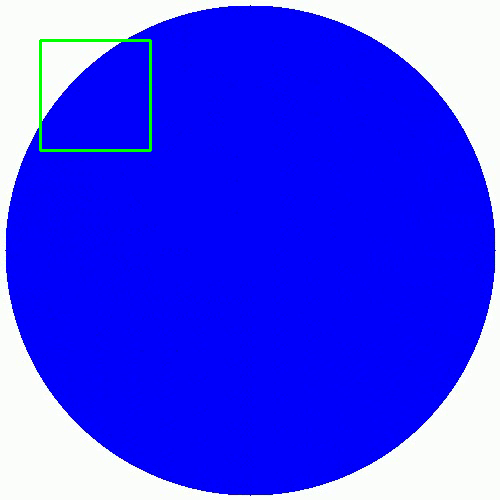

In [ ]:
#這裡適用本地端
p1=cv2.VideoCapture("1.mp4") #取得影像來源1.mp4
while p1.isOpened()==True: #判斷影像來源是否有開啟,Ture代表有成功,False代表失敗
  ret, m1=p1.read() #取得影像：變數一, 變數二=控制變數.read() >>> 變數1(ret)代表是否成功取得 , m1代表圖像
  if ret==True: #ret來判斷是否取得影像,這裡用if判斷是否有取得,false則代表沒有取得(代表跑到最後一張)
    dp.clear_output(True)
    cv2.rectangle(m1, (40,40), (150,150), (0,255,0), 2) #用ret判斷的好處是,我可以在跑圖過程中加一張圖
    cv2_imshow(m1)
    time.sleep(0.3)
  else:
    break

In [ ]:
p1=cv2.VideoCapture("1.mp4")
#下面可以看到各個影片資訊
print("畫面寬：",p1.get(3))
print("畫面高：",p1.get(4))
print("畫面影格數(FPS)：",p1.get(5)) #每秒跑幾張,會影響畫面跑速
print("影片的總影格數：",p1.get(7))
p1.set(1,20) #可以用這個參數控制當前影格指到20格再開始,前面的參數是指到get
while p1.isOpened()==True:
  print("當前的影格：",p1.get(1)) 
  ret, m1=p1.read()
  if ret==True:
    # dp.clear_output(True) 這個要註解起來,才能看到每一次的,不然會被清掉
    cv2.rectangle(m1, (40,40), (150,150), (0,255,0), 2)
    # cv2_imshow(m1)
    # time.sleep(0.3)
  else: #ret!=Ture,基本上就是false,代表圖像讀完了
    break

畫面寬： 500.0
畫面高： 500.0
畫面影格數(FPS)： 24.0
影片的總影格數： 9.0
當前的影格： 9.0


In [ ]:
p1=cv2.VideoCapture("1.mp4")
if p1.isOpened()==True: #先確認有讀到檔案
  for i in range(0,int(p1.get(7)),1): #已知跑了p1.get(7)張圖,就可以用for迴圈跑出每一張,用int是因為拿到的張數會有小數點 ##實際上跑的影格數不會有小數點(都是整數)
    ret, m1=p1.read() #不用像while要用if判斷最後一張,因為p1.get(7)已告訴你這支影片有幾張
    dp.clear_output(True)
    cv2.rectangle(m1, (40,40), (150,150), (0,255,0), 2) #如果方形寫在前面,會被圓圈覆寫掉
    if int(p1.get(1)) >= 5: #試玩,在第五張後面插入一條線
      cv2.line(m1, (20,20), (20,200), (0,0,255), 2) #畫一條線:變數,起點,終點,線條顏色,線條粗細
    cv2_imshow(m1)
    time.sleep(0.3)

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1) #1.jpg用彩色讀入
m1_2=cv2.imread("1_2.jpg",1)
# m2=np.full(m1.shape,100,np.uint8) #m2填一個純色為100,100,100
#如果相加>255,就會以255計算,所以最大相加就是(255,255,255)>白色
# m3=cv2.add(m1,m2) #m1+m2 相加的話就是顏色數值相加,因此亮度會提升(越接近255,越接近白色) #add只能用同類相加,ex:灰階+灰階、彩階+彩階...
# m4=cv2.add(m1, (100,100,100,0)) #或可以直接加數值,要把BGR&透明四個數值都填上 #透明度是給繪圖軟體用的,程式上面不會顯示 
cv2_imshow(m1)
cv2_imshow(m1_2)
m5=cv2.add(m1,m1_2) #兩個圖片做相加test ###這裡兩個圖片的大小&色階模式要是一樣的
# cv2_imshow(m1)
# cv2_imshow(m2)
# cv2_imshow(m3)
# cv2_imshow(m4)
cv2_imshow(m5) #兩個圖片相加會有疊圖的效果


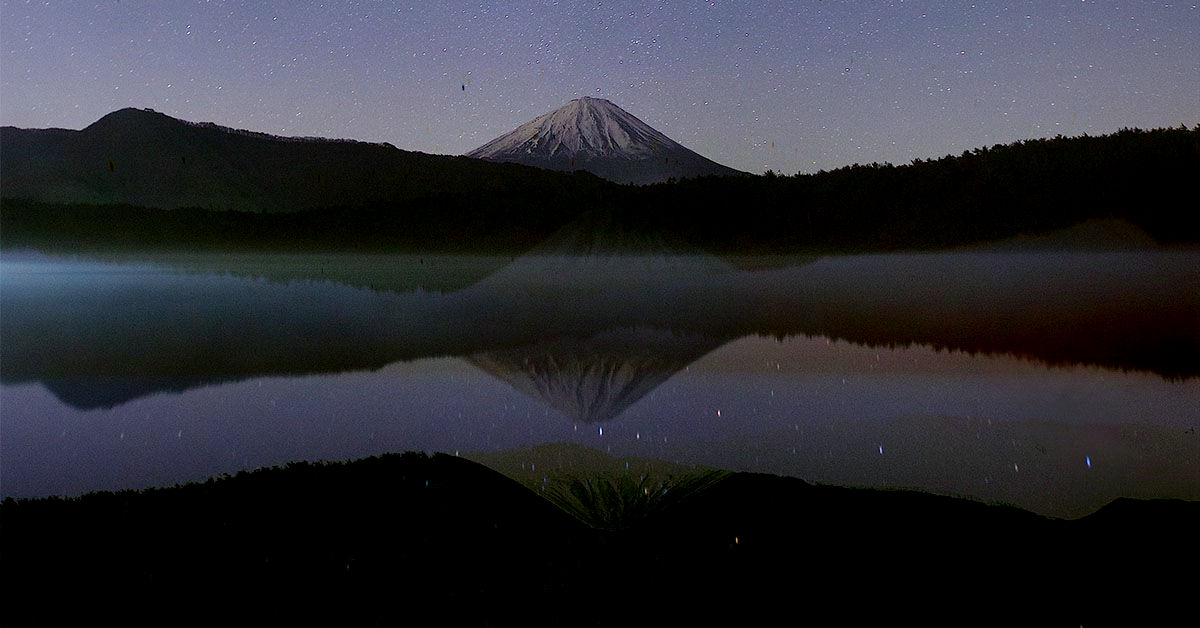

In [ ]:
#減法差異性
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1)
m1_2=cv2.imread("1_2.jpg",1)
m5=cv2.subtract(m1,m1_2)
# m2=np.full(m1.shape,100,np.uint8)
# m3=cv2.add(m1, (100,100,100,0))
# m3=cv2.subtract(m1, (255,255,255,0)) #如果低於0,就會變0,所以這裡變(0,0,0)>黑色
# cv2_imshow(m1)
# cv2_imshow(m3)
cv2_imshow(m5)

In [ ]:
#絕對值減法 > 有的會變亮/有的會變暗 > 負片效果
###圖片的運算,就是用array做運算(矩陣*矩陣),如果單純用+-*/去計算也可以,但是就有可能>255 or <0 , 就會破圖
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1)
m3=cv2.absdiff(m1, (255,255,255,0)) #絕對值減法,如果結果是-123,就會變123
cv2_imshow(m1)
cv2_imshow(m3)
#這個效果會跟not運算依樣>>>各像素值在二進位表示下做not運算：結果圖像=cv2.bitwise_not(圖像變數)

In [ ]:
#先除後乘,會有壓縮的效果
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1)
m3=cv2.divide(m1, (85,85,85,0)) #除法是瞬暗 #先做除法,除法指會取整數(四捨五入),這裡除85,會將圖片數值區分成0/1/2/3四種結果
m3=cv2.multiply(m3, (85,85,85,0)) #乘法是瞬亮 #再乘回85,圖片數值就指有 0/85/170/255 四種結果 >>> 簡化圖片顏色 #顏色剩4*4*4=64種(不計算透明度)

cv2_imshow(m1)
cv2_imshow(m3)

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2 #也會載入numpy
import numpy as np #這裡是用到numpy>>>建議都載入,常常混用
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1) #用cv2本來就會借用numpy的矩陣
#直接使用numpy做計算,0~255就會變成一個循環,256=0,-1=255 >>> 這樣不符合圖象運作 >>>就換變乘像破圖,原本是接近白色,計算完就變黑色
#加減的數值必須在255內,才符合他的運算機制>>>才不會成為非圖片
m2=m1+50
m3=m1+500 #如果超值,就會轉乘矩陣型態
cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)
print(m3)#如果超值,就會轉乘矩陣型態

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1)
m2=cv2.resize(m1, (500,500)) #圖像縮放：結果圖像變數=cv2.resize(圖像變數, 新圖像大小) >>> 如果要等比例,就要是等比例的大小
cv2_imshow(m1)
# cv2_imshow(m2)
w=500
# h=int(m1.shape[0]/(m1.shape[1]/w)) #比例的計算,在維持寬(w)=500的情況下,等比例的高(h)會是= 原高/ (原寬/500)
h = int(m1.shape[0]*(w/m1.shape[1])) #比例計算 #也可以這樣寫,比例尺: 500/原寬(w) = ?倍 >>> 再用原高(h)*?倍
m3=cv2.resize(m1, (w,h))
cv2_imshow(m3)
#也可以這樣
a = m1.shape[0] *2 #高
b = m1.shape[0] *2 #寬
m4=cv2.resize(m1, (a,b))
cv2_imshow(m4)

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1)

m2=cv2.flip(m1, -1) #結果圖像=cv2.flip(圖像變數, 翻轉方式) 1 => 左右翻轉 0 => 上下翻轉 -1 => 左右與上下皆翻轉

cv2_imshow(m1)
cv2_imshow(m2)


#圖像旋轉：結果圖像=cv2.warpAffine(圖像變數, 變換矩陣, 輸出的圖像大小)
#變換矩陣：cv2.getRotationMatrix2D(旋轉中心, 角度, 縮放比率)
m3=cv2.warpAffine(m1, cv2.getRotationMatrix2D((200,200), 45, 0.5), (500,500)) #輸出大小設(0,0)會跑到例外處理
cv2_imshow(m3)


In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
#圖片的覆蓋
m1=cv2.imread("1.jpg",1)
m2=cv2.imread("2.jpg",1)

#透過numpy的矩陣變數功能可以作到裁切效果： 圖像變數[Y軸範圍起始:Y軸範圍結束, X軸範圍起始: X軸範圍結束] 
m2[0:50,50:150]=m1[50:100,100:200] #這裡的圖片覆蓋,就是矩陣內數值的覆蓋,矩陣的大小要一樣才能做覆蓋
###>>>上下這兩行是一樣的
# m3=m1[50:100,100:200] #把m1的part截出來丟進m3 ###這裡就是圖片的裁切
# m2[0:50,50:150]=m3 #再把m3的值覆蓋(取代)掉m2 >>> 就是圖片的覆蓋 
>>>可以用::2 代表每兩格取一次

### m2[:m1.shape[0],:m1.shape[1]]=m1 #這裡是表示,全圖取代(覆蓋),把m1覆蓋在m2上
###ValueError: could not broadcast input array from shape (628,1200,3) into shape (600,900,3) >>>出錯的意思是,m1圖片大小比m2小,這樣不能覆蓋

# m1[:m2.shape[0],:m2.shape[1]]=m2 #這裡是表示,全圖取代(覆蓋),把m1覆蓋在m2上


cv2_imshow(m1)
print("")
cv2_imshow(m2)
# print("")
# cv2_imshow(m3)

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1)
m2=cv2.imread("3.png",1)

# m2[:m1.shape[0]:2,:m1.shape[1]:2]=m1[::2,::2]

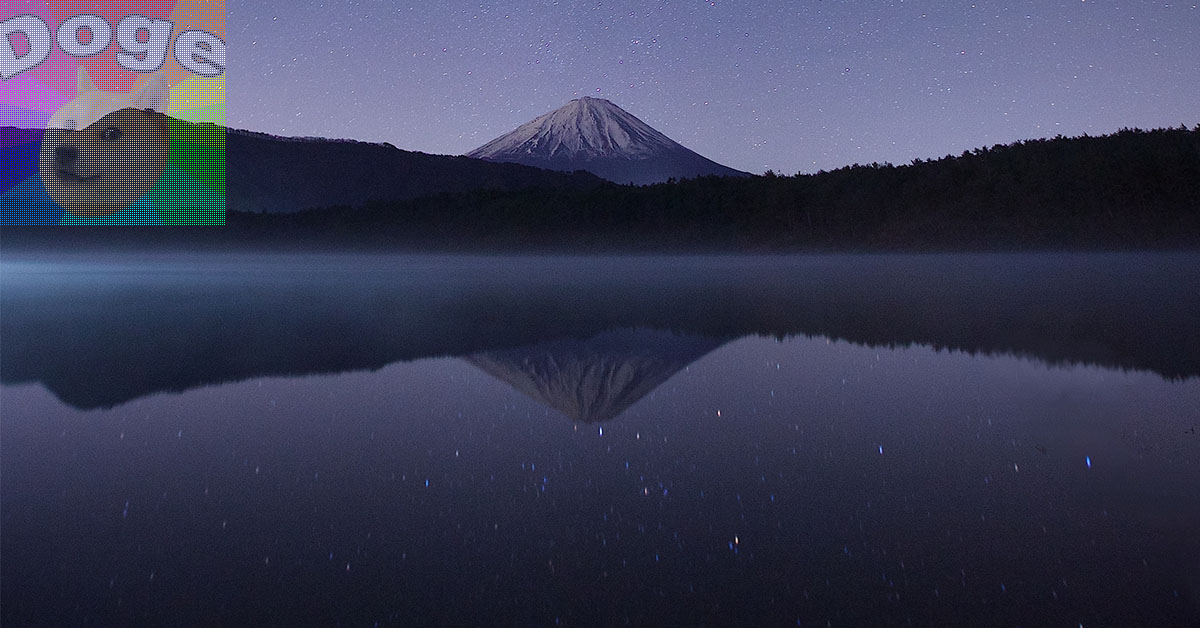

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("2.jpg",1)
m2=cv2.imread("1.jpg",1)

#這裡在做圖片交叉重疊
m2[:m1.shape[0]:2,:m1.shape[1]:2]=m1[::2,::2] #x:y:z , x起始值 y終值 z代表每隔區間(有點像range(x,y,z)) , x&y沒有填就是指全部
print("")
cv2_imshow(m2)

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("1.jpg",1)
m2=cv2.imread("2.jpg",1)

m2[:m1.shape[0]:2,:m1.shape[1]:2]=m1[::2,::2]

cv2_imshow(m2[:,:,0])#影像拆解：第三維:顏色-0是藍色 ,把藍色印出來 ,顏色是一個多維值所組成,所以抽單一個出來,會是灰階
print(m1[:,:,0].shape) #印出來,你會看到是一個二維陣列
cv2_imshow(m2[:,:,1])#第三維:顏色-1是綠色 ,把綠色印出來
cv2_imshow(m2[:,:,2])#第三維:顏色-2是紅色 ,把紅色印出來
print("")
# cv2_imshow(m2)


In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
m1=cv2.imread("3.jpg",1) #做白平衡,用一個風景圖,比較明顯

#取平均：圖像變數.mean()
Bavg=m1[:,:,0].mean() #取藍色每一個像素相加的平均值
Gavg=m1[:,:,1].mean() #取綠色每一個像素相加的平均值
Ravg=m1[:,:,2].mean() #取紅色每一個像素相加的平均值

Avg=Bavg+Gavg+Ravg
m2=m1.copy() #先copy一個m1到m2,再調整
m2[:,:,0]=cv2.multiply(m1[:,:,0], (Avg/(Bavg*3))) #藍平衡:把m2裡面的藍色,使用白平衡公式做處理,其中大R是矩陣,所以要用cv2.multiply的方式去乘
m2[:,:,1]=cv2.multiply(m1[:,:,1], (Avg/(Gavg*3))) #綠平衡:綠色做公式處理
m2[:,:,2]=cv2.multiply(m1[:,:,2], (Avg/(Ravg*3))) #紅平衡:紅色做公式處理

cv2_imshow(m1)
cv2_imshow(m2)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

#圖片的翻轉
img1 = cv2.imread("2.jpg", 1)
y = img1.shape[0]
x = img1.shape[1]
print(x, y)
cv2.circle(img1, (x // 2, y // 2), 5, (0,0,255), -1)
for i in range(0, 360+1, 10):
    img3 = cv2.warpAffine(img1, cv2.getRotationMatrix2D((y // 2, x // 2), i, 1), (500, 500))
    print(x//2, y//2)
    cv2.imshow(img3)



225 225
112 112


DisabledFunctionError: ignored